# Dataset yang digunakan

Zachary Karate Club (34 Node, 78 Edge)<br>
Facebook Large Page-Page Network (22470 Node, 171003 Edge)

# Zachary Karate Club

## Preprocess

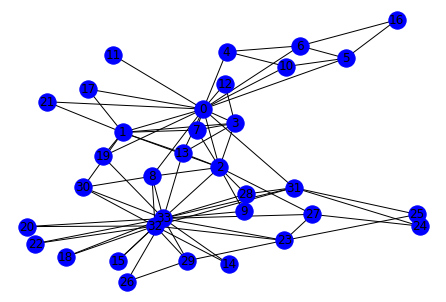

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.read_gml("karate.gml")
nx.draw(G, with_labels=True, node_color='b')
plt.show()

## Algoritma

Dalam project ini terdapat 4 algoritma yang digunakan, yaitu:<br>
Algoritma Girvan-Newman<br>
Algoritma Infomap<br>
Algoritma Walktrap<br>
Algoritma Fast Greedy

### Algoritma Girvan-Newman

In [15]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '16',
  '17',
  '19',
  '21',
  '3',
  '4',
  '5',
  '6',
  '7'],
 ['14',
  '15',
  '18',
  '2',
  '20',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '8'],
 ['9']]

Plot hasil dari algoritma Girvan-Newman

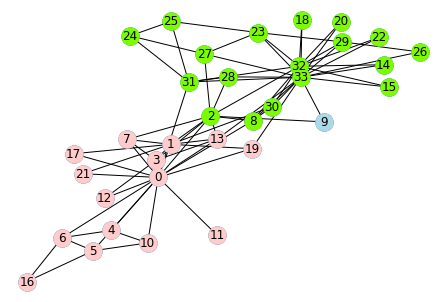

In [17]:
node_lists_community1 = [0, 1, 10, 11, 12, 13, 16, 17, 19, 21, 3, 4, 5, 6, 7]
node_lists_community2 = [14, 15, 18, 2, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 8]
node_lists_community3 = [9]
all_nodes = node_lists_community1+ node_lists_community2+ node_lists_community3

elist = [(0,1), (0,2), (0,3), (0,4), (0,5), (0,6),
         (0,7), (0,8), (0,10), (0,11), (0,12), (0,13),
         (0,17), (0,19), (0,21), (0,31), (1,2), (1,3),
         (1,7), (1,13), (1,17), (1,19), (1,21), (1,30),
         (2,3), (2,7), (2,8), (2,9), (2,13), (2,27),
         (2,28), (2,32), (3,7), (3,12), (3,13), (4,6),
         (4,10), (5,6), (5,10), (5,16), (6,16), (8,30),
         (8,32), (8,33), (9,33), (13,33), (14,32), (14,33),
         (15,32), (15,33), (18,32), (18,33), (19,33), (20,32),
         (20,33), (22,32), (22,33), (23,25), (23,27), (23,29),
         (23,32), (23,33), (24,25), (24,27), (24,31), (25,31),
         (26,29), (26,33), (27,33), (28,31), (28,33), (29,32),
         (29,33), (30,32), (30,33), (31,32), (31,33), (32,33)]

G_girvan = nx.Graph()
for n in all_nodes:
    G_girvan.add_node(n)
for from_loc, to_loc in elist:
    G_girvan.add_edge(from_loc, to_loc) 

pos = nx.spring_layout(G_girvan)

nx.draw(G_girvan, pos, edge_color='k',  with_labels=True)
nx.draw_networkx_nodes(G_girvan, pos, nodelist=node_lists_community1, node_color='#ffcccb')
nx.draw_networkx_nodes(G_girvan, pos, nodelist=node_lists_community2, node_color='#7CFC00')
nx.draw_networkx_nodes(G_girvan, pos, nodelist=node_lists_community3, node_color='#add8e6')

Simulasi algoritma Girvan-Newman dengan penghitungan Edge Betweenness

In [18]:
nx.edge_betweenness_centrality(G)

{('0', '1'): 0.025252525252525245,
 ('0', '2'): 0.0777876807288572,
 ('0', '3'): 0.02049910873440285,
 ('0', '4'): 0.0522875816993464,
 ('0', '5'): 0.07813428401663694,
 ('0', '6'): 0.07813428401663695,
 ('0', '7'): 0.0228206434088787,
 ('0', '8'): 0.07423959482783014,
 ('0', '10'): 0.0522875816993464,
 ('0', '11'): 0.058823529411764705,
 ('0', '12'): 0.04652406417112298,
 ('0', '13'): 0.04237189825425121,
 ('0', '17'): 0.04012392835922248,
 ('0', '19'): 0.045936960642843,
 ('0', '21'): 0.040123928359222474,
 ('0', '31'): 0.1272599949070537,
 ('1', '2'): 0.023232323232323233,
 ('1', '3'): 0.0077243018419489,
 ('1', '7'): 0.007422969187675069,
 ('1', '13'): 0.01240556828792123,
 ('1', '17'): 0.01869960105254222,
 ('1', '19'): 0.014633732280791102,
 ('1', '21'): 0.01869960105254222,
 ('1', '30'): 0.032280791104320514,
 ('2', '3'): 0.022430184194890075,
 ('2', '7'): 0.025214328155504617,
 ('2', '8'): 0.009175791528732704,
 ('2', '9'): 0.030803836686189627,
 ('2', '13'): 0.0076309311603429

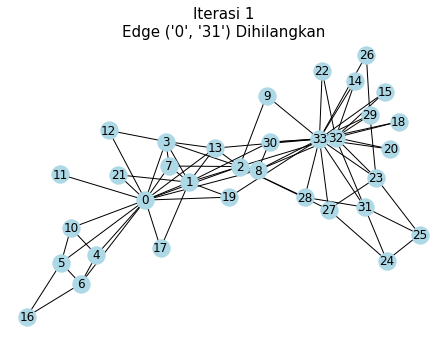

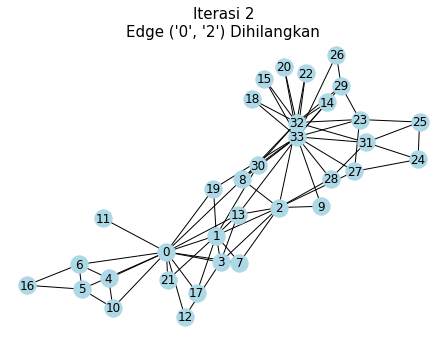

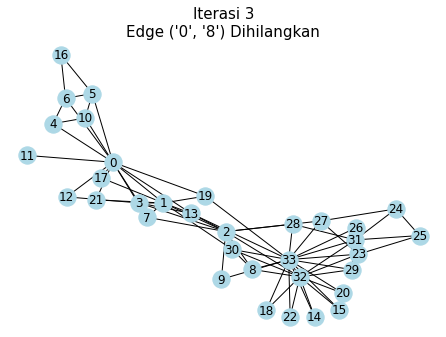

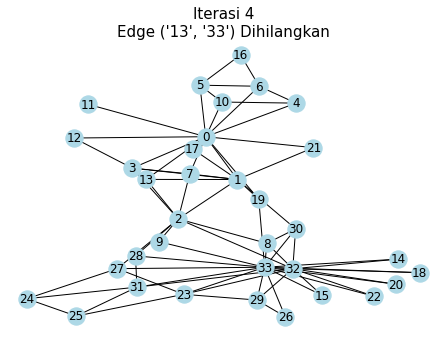

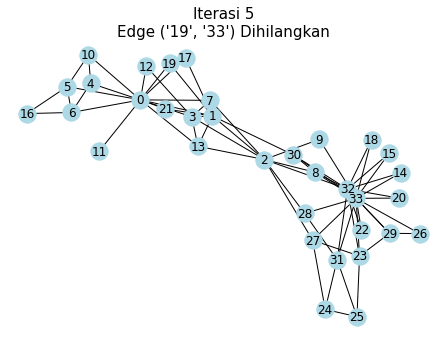

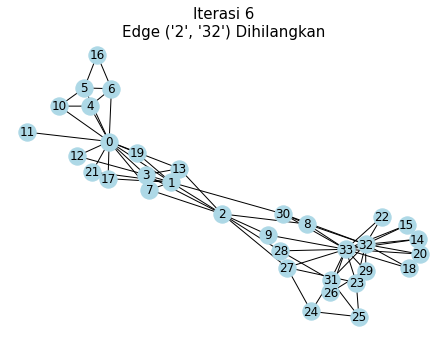

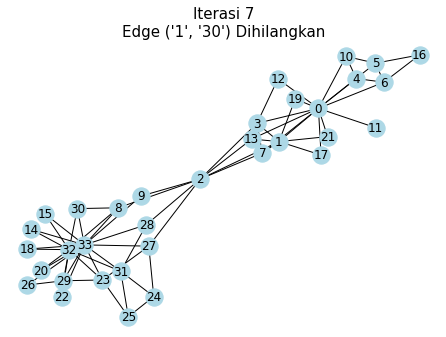

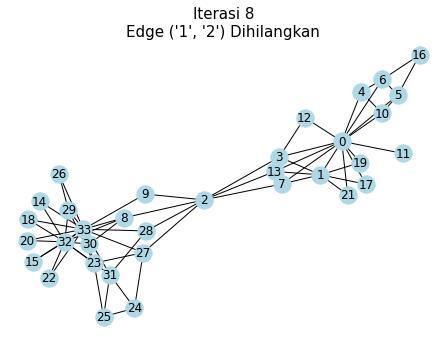

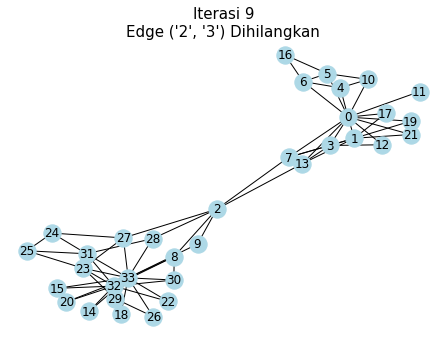

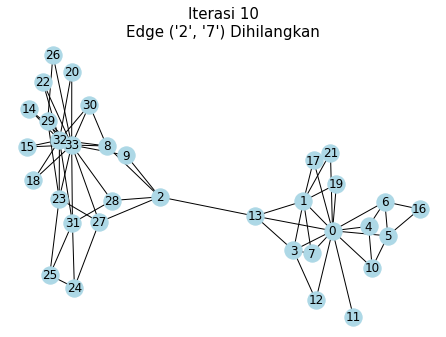

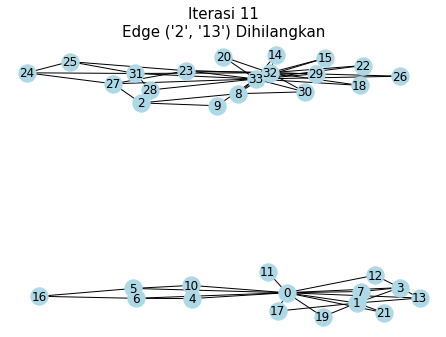

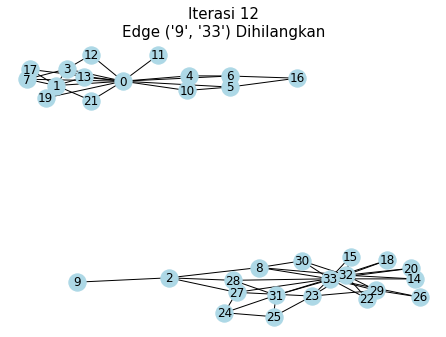

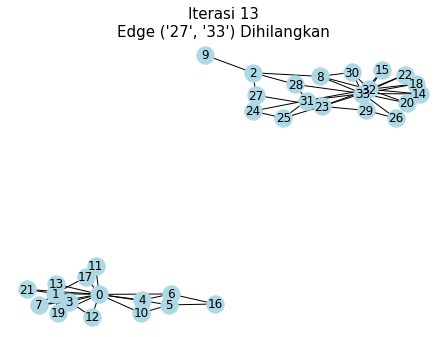

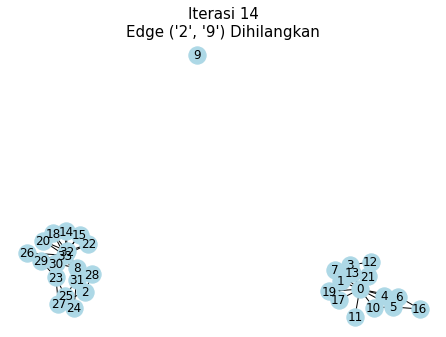

In [19]:
NUM_ITERATIONS = 14
for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]
    G.remove_edge(*edge_to_delete)
    nx.draw(G, with_labels=True, node_color='#add8e6')
    plt.title('Iterasi %s\nEdge %s Dihilangkan'%(i+1, edge_to_delete), fontsize=15)
    plt.show()

### Algoritma Infomap

In [20]:
from igraph import *

In [21]:
ig = Graph.Read_GML("karate.gml")
infomap = ig.community_infomap()
print(infomap)

Clustering with 34 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [30]:
print(infomap.membership)

[0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Plot hasil algoritma Infomap

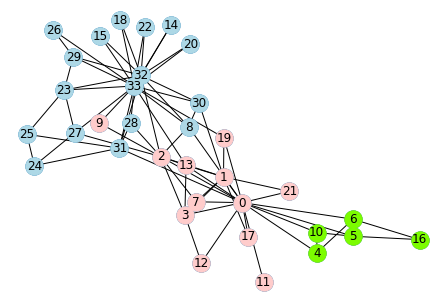

In [22]:
node_lists_community1 = [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
node_lists_community2 = [4, 5, 6, 10, 16]
node_lists_community3 = [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
all_nodes = node_lists_community1+ node_lists_community2+ node_lists_community3

elist = [(0,1), (0,2), (0,3), (0,4), (0,5), (0,6),
         (0,7), (0,8), (0,10), (0,11), (0,12), (0,13),
         (0,17), (0,19), (0,21), (0,31), (1,2), (1,3),
         (1,7), (1,13), (1,17), (1,19), (1,21), (1,30),
         (2,3), (2,7), (2,8), (2,9), (2,13), (2,27),
         (2,28), (2,32), (3,7), (3,12), (3,13), (4,6),
         (4,10), (5,6), (5,10), (5,16), (6,16), (8,30),
         (8,32), (8,33), (9,33), (13,33), (14,32), (14,33),
         (15,32), (15,33), (18,32), (18,33), (19,33), (20,32),
         (20,33), (22,32), (22,33), (23,25), (23,27), (23,29),
         (23,32), (23,33), (24,25), (24,27), (24,31), (25,31),
         (26,29), (26,33), (27,33), (28,31), (28,33), (29,32),
         (29,33), (30,32), (30,33), (31,32), (31,33), (32,33)]

G_infomap = nx.Graph()
for n in all_nodes:
    G_infomap.add_node(n)
for from_loc, to_loc in elist:
    G_infomap.add_edge(from_loc, to_loc) 

pos = nx.spring_layout(G_infomap)

nx.draw(G_infomap, pos, edge_color='k',  with_labels=True)
nx.draw_networkx_nodes(G_infomap, pos, nodelist=node_lists_community1, node_color='#ffcccb')
nx.draw_networkx_nodes(G_infomap, pos, nodelist=node_lists_community2, node_color='#7CFC00')
nx.draw_networkx_nodes(G_infomap, pos, nodelist=node_lists_community3, node_color='#add8e6')

### Algoritma Walktrap

In [24]:
walktrap = ig.community_walktrap()
print(walktrap)

Dendrogram, 34 elements, 33 merges

19 0 7 3 1 21 17 12 11 10 4 6 5 16 13 2 9 30 8 31 28 33 32 15 14 18 20 22 29 26 27 23 25 24
|  | | | | |  |  |  |  |  | | | |  |  | | |  | |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
|  | `-' | |  |  |  |  `--' `-' |  |  | | `--' |  |  `--'  |  |  |  |  |  `--'  |  |  `--'
|  |  |  | |  |  |  |   |    |  |  |  | |  |   |  |   |    |  |  |  |  |   |    |  |   |  
|  |  `--' |  |  |  |   |    |  |  `--' |  |   |  |   `----'  |  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |     |     |  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |     `-----'  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |        |     |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |        `-----'  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |           |     |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |  

Plot hasil algoritma Walktrap

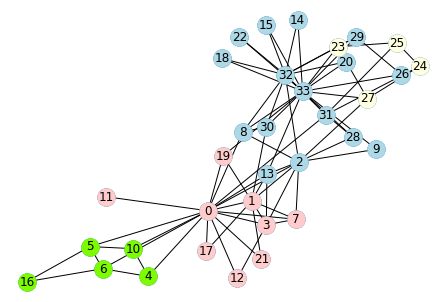

In [26]:
node_lists_community1 = [19, 0, 7, 3, 1, 21, 17, 12, 11]
node_lists_community2 = [4, 5, 6, 10, 16]
node_lists_community3 = [13, 2, 9, 30, 8, 31, 28, 33, 32, 15, 14, 18, 20, 22, 29, 26]
node_lists_community4 = [27, 23, 25, 24]
all_nodes = node_lists_community1+ node_lists_community2+ node_lists_community3+ node_lists_community4

elist = [(0,1), (0,2), (0,3), (0,4), (0,5), (0,6),
         (0,7), (0,8), (0,10), (0,11), (0,12), (0,13),
         (0,17), (0,19), (0,21), (0,31), (1,2), (1,3),
         (1,7), (1,13), (1,17), (1,19), (1,21), (1,30),
         (2,3), (2,7), (2,8), (2,9), (2,13), (2,27),
         (2,28), (2,32), (3,7), (3,12), (3,13), (4,6),
         (4,10), (5,6), (5,10), (5,16), (6,16), (8,30),
         (8,32), (8,33), (9,33), (13,33), (14,32), (14,33),
         (15,32), (15,33), (18,32), (18,33), (19,33), (20,32),
         (20,33), (22,32), (22,33), (23,25), (23,27), (23,29),
         (23,32), (23,33), (24,25), (24,27), (24,31), (25,31),
         (26,29), (26,33), (27,33), (28,31), (28,33), (29,32),
         (29,33), (30,32), (30,33), (31,32), (31,33), (32,33)]

G_walktrap = nx.Graph()
for n in all_nodes:
    G_walktrap.add_node(n)
for from_loc, to_loc in elist:
    G_walktrap.add_edge(from_loc, to_loc) 

pos = nx.spring_layout(G_walktrap)

nx.draw(G_walktrap, pos, edge_color='k',  with_labels=True)
nx.draw_networkx_nodes(G_walktrap, pos, nodelist=node_lists_community1, node_color='#ffcccb')
nx.draw_networkx_nodes(G_walktrap, pos, nodelist=node_lists_community2, node_color='#7CFC00')
nx.draw_networkx_nodes(G_walktrap, pos, nodelist=node_lists_community3, node_color='#add8e6')
nx.draw_networkx_nodes(G_walktrap, pos, nodelist=node_lists_community4, node_color='#ffffe0')

### Algoritma Fast Greedy

In [28]:
fg = ig.community_fastgreedy()
print(fg)

Dendrogram, 34 elements, 33 merges

18 22 15 8 30 32 24 25 31 28 26 29 33 23 27 14 20 7 3 12 9 2 13 1 17 21 19 16 5 6 0 4 10 11
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  |  | | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  `--' | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   |   | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   `---' | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     |   | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     `---' | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       |   | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       `---' |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |         |   |  |
|  |  |  | |  |  |  |  |  |  `--'  |  |  |  |  |  | |

Plot hasil algoritma Fast Greedy

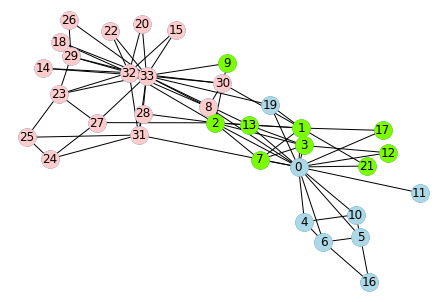

In [29]:
node_lists_community1 = [18, 22, 15, 8, 30, 32, 24, 25, 31, 28, 26, 29, 33, 23, 27, 14, 20]
node_lists_community2 = [7, 3, 12, 9, 2, 13, 1, 17, 21]
node_lists_community3 = [19, 16, 5, 6, 0, 4, 10, 11]
all_nodes = node_lists_community1+ node_lists_community2+ node_lists_community3

elist = [(0,1), (0,2), (0,3), (0,4), (0,5), (0,6),
         (0,7), (0,8), (0,10), (0,11), (0,12), (0,13),
         (0,17), (0,19), (0,21), (0,31), (1,2), (1,3),
         (1,7), (1,13), (1,17), (1,19), (1,21), (1,30),
         (2,3), (2,7), (2,8), (2,9), (2,13), (2,27),
         (2,28), (2,32), (3,7), (3,12), (3,13), (4,6),
         (4,10), (5,6), (5,10), (5,16), (6,16), (8,30),
         (8,32), (8,33), (9,33), (13,33), (14,32), (14,33),
         (15,32), (15,33), (18,32), (18,33), (19,33), (20,32),
         (20,33), (22,32), (22,33), (23,25), (23,27), (23,29),
         (23,32), (23,33), (24,25), (24,27), (24,31), (25,31),
         (26,29), (26,33), (27,33), (28,31), (28,33), (29,32),
         (29,33), (30,32), (30,33), (31,32), (31,33), (32,33)]

G_fg = nx.Graph()
for n in all_nodes:
    G_fg.add_node(n)
for from_loc, to_loc in elist:
    G_fg.add_edge(from_loc, to_loc) 

pos = nx.spring_layout(G_fg)

nx.draw(G_fg, pos, edge_color='k',  with_labels=True)
nx.draw_networkx_nodes(G_fg, pos, nodelist=node_lists_community1, node_color='#ffcccb')
nx.draw_networkx_nodes(G_fg, pos, nodelist=node_lists_community2, node_color='#7CFC00')
nx.draw_networkx_nodes(G_girvan, pos, nodelist=node_lists_community3, node_color='#add8e6')

## Evaluasi

Hasil algoritma Girvan-Newman akan digunakan sebagai data ground-truth<br>
Hasil algoritma lainnya akan dibandingkan dengan data ground-truth dan dihitung RI, ARI dan NMI

Karena hanya algoritma infomap yang menghasilkan atribut membership, jadi perlu diassign untuk hasil algoritma lainnya

In [32]:
girvan_newman_res = [0,0,1,0,0,0,0,0,1,2,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
walktrap_res = [0,0,2,0,1,1,1,0,2,2,1,0,0,2,2,2,1,0,2,0,2,0,2,3,3,3,2,3,2,2,2,2,2,2]
fast_greedy_res = [2,1,1,1,2,2,2,1,0,1,2,2,1,1,0,0,2,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

In [33]:
girvan_newman_modularity = ig.modularity(girvan_newman_res)
infomap_modularity = ig.modularity(infomap.membership)
walktrap_modularity = ig.modularity(walktrap_res)
fast_greedy_modularity = ig.modularity(fast_greedy_res)

print("Modularity Girvan-Newman: ", girvan_newman_modularity)
print("Modularity Infomap: ", infomap_modularity)
print("Modularity Walktrap: ", walktrap_modularity)
print("Modularity Fast Greedy: ", fast_greedy_modularity)

Modularity Girvan-Newman:  0.34878369493754113
Modularity Infomap:  0.40203813280736367
Modularity Walktrap:  0.3519888231426693
Modularity Fast Greedy:  0.3806706114398422


In [34]:
RI_infomap = compare_communities(infomap.membership,girvan_newman_res,method="rand")
ARI_infomap = compare_communities(infomap.membership,girvan_newman_res,method="adjusted.rand")
NMI_infomap = compare_communities(infomap.membership,girvan_newman_res,method="nmi")

print("RI Infomap: ", RI_infomap)
print("ARI Infomap: ", ARI_infomap)
print("NMI Infomap: ", NMI_infomap)

RI Infomap:  0.8431372549019608
ARI Infomap:  0.6800062225333489
NMI Infomap:  0.6694262806577245


In [36]:
RI_walktrap = compare_communities(walktrap_res,girvan_newman_res,method="rand")
ARI_walktrap = compare_communities(walktrap_res,girvan_newman_res,method="adjusted.rand")
NMI_walktrap = compare_communities(walktrap_res,girvan_newman_res,method="nmi")

print("RI Walktrap: ", RI_walktrap)
print("ARI Walktrap: ", ARI_walktrap)
print("NMI Walktrap: ", NMI_walktrap)

RI Walktrap:  0.7433155080213903
ARI Walktrap:  0.4701924212017471
NMI Walktrap:  0.5714567539802493


In [37]:
RI_fg = compare_communities(fast_greedy_res,girvan_newman_res,method="rand")
ARI_fg = compare_communities(fast_greedy_res,girvan_newman_res,method="adjusted.rand")
NMI_fg = compare_communities(fast_greedy_res,girvan_newman_res,method="nmi")

print("RI Fast Greedy: ", RI_fg)
print("ARI Fast Greedy: ", ARI_fg)
print("NMI Fast Greedy: ", NMI_fg)

RI Fast Greedy:  0.843137254901961
ARI Fast Greedy:  0.6788822542247205
NMI Fast Greedy:  0.6742911905693737


## Facebook Large Page-Page Network 

In [1]:
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *

## Preprocess

In [2]:
vertices = sqlContext.read.csv("musae_facebook_target.csv", header=True)

In [3]:
edges_unfiltered = sqlContext.read.csv("musae_facebook_target.csv", header=True)

In [4]:
edges = edges_unfiltered.filter("src != dst")

In [5]:
edges.filter("src == dst").show()

+---+---+
|src|dst|
+---+---+
+---+---+



In [23]:
edges.count()

170823

In [6]:
g = GraphFrame(vertices, edges)

In [7]:
g.vertices.show()

+---+----------------+--------------------+----------+
| id|     facebook_id|           page_name| page_type|
+---+----------------+--------------------+----------+
|  0| 145647315578475|The Voice of Chin...|    tvshow|
|  1|    191483281412|U.S. Consulate Ge...|government|
|  2| 144761358898518|                ESET|   company|
|  3| 568700043198473|Consulate General...|government|
|  4|1408935539376139|Mark Bailey MP - ...|politician|
|  5| 134464673284112| Victor Dominello MP|politician|
|  6| 282657255260177|Jean-Claude Poissant|politician|
|  7| 239338246176789|Deputado Ademir C...|politician|
|  8| 544818128942324|T.C. Mezar-ı Şeri...|government|
|  9|    285155655705|Army ROTC Fightin...|government|
| 10| 295294787190810| NASA Student Launch|government|
| 11| 837707072929819|       Eliziane Gama|politician|
| 12|    189778427932|     Socialstyrelsen|government|
| 13| 153345494745119|Brisbane Water LA...|government|
| 14|    374623305761|NASA's Marshall S...|government|
| 15| 1359

In [8]:
g.edges.show()

+---+-----+
|src|  dst|
+---+-----+
|  0|18427|
|  1|21708|
|  1|22208|
|  1|22171|
|  1| 6829|
|  1|16590|
|  1|20135|
|  1| 8894|
|  1|15785|
|  1|10281|
|  1|22265|
|  1| 7136|
|  1|22405|
|  1|10379|
|  1|13737|
|  1| 8533|
|  1|14344|
|  1| 2812|
|  1| 5755|
|  1|16260|
+---+-----+
only showing top 20 rows



## Situs yang memiliki degree paling banyak (dominan)

In [29]:
from pyspark.sql.functions import desc

g.degrees.sort(desc("degree")).show()

+-----+------+
|   id|degree|
+-----+------+
|16895|   709|
|19743|   678|
|21729|   659|
|14497|   650|
| 1387|   504|
|10379|   468|
|19347|   448|
|21120|   417|
| 2442|   408|
| 8139|   387|
|  701|   380|
|15236|   375|
|10426|   370|
| 9319|   364|
| 8883|   351|
|11003|   341|
| 9294|   338|
| 5458|   333|
|13294|   330|
|22171|   330|
+-----+------+
only showing top 20 rows



## Menampilkan situs dengan kategori tertentu

In [10]:
g.vertices.filter('page_type == "tvshow"').show()

+---+----------------+--------------------+---------+
| id|     facebook_id|           page_name|page_type|
+---+----------------+--------------------+---------+
|  0| 145647315578475|The Voice of Chin...|   tvshow|
| 27| 220206968012871|           Poppy Cat|   tvshow|
| 44|1507698529534072|             APB FOX|   tvshow|
| 52|1388741348032650|        식샤를합시다|   tvshow|
| 55| 141018599260302|          Abendschau|   tvshow|
| 68| 128837483823282|        SVT Kortfilm|   tvshow|
| 69|    248466702367|     Toute la vérité|   tvshow|
| 70|     49649942718|      Modern Marvels|   tvshow|
| 79| 537191503102185|            11.22.63|   tvshow|
| 96| 139152096100639|Noticias Univisio...|   tvshow|
| 99| 296432197042477|  Bericht aus Berlin|   tvshow|
|101| 104513569620273|  The X Factor (USA)|   tvshow|
|111| 445821135487302|  Inside Amy Schumer|   tvshow|
|117| 109295382430039|             RECLAME|   tvshow|
|119| 109735015743837|     Barwy Szczęścia|   tvshow|
|140| 368704976650667|         SoF

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from igraph import *

## Plot grafik dari GraphFrames menggunakan NetworkX

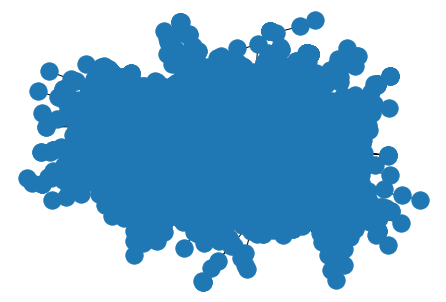

In [18]:
Gplot=nx.Graph()
for row in g.edges.select('src','dst').take(171002):
    Gplot.add_edge(row['src'],row['dst'])

nx.draw(Gplot, with_labels=True, node_color='b')

## Menjalankan algoritma Girvan-Newman (Interrupted)

In [19]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(Gplot)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

KeyboardInterrupt: 

### Algoritma Infomap

In [21]:
ig = Graph.TupleList(g.edges.collect(), directed=False)
infomap = ig.community_infomap()

In [22]:
print(infomap)

Clustering with 22470 elements and 1054 clusters
[   0] 0, 18427, 14266, 3897, 419, 17959, 633, 18447, 3179, 1365, 15356, 2257,
       4665, 6692, 8358, 16343, 11276, 18873, 12273, 12726, 4783, 4831, 22322,
       5742, 11763, 10635, 6821, 16486, 16687, 21808, 18165, 21437, 20150
[   1] 1, 21708, 22208, 22171, 6829, 16590, 20135, 8894, 15785, 10281, 7136,
       22405, 10379, 13737, 8533, 14344, 2812, 5755, 16260, 15026, 17370,
       17460, 8049, 5307, 4987, 12305, 19743, 21729, 5228, 9934, 1041, 13899,
       88, 7550, 11657, 13264, 8243, 19476, 840, 18971, 14181, 14272, 7535,
       12500, 1047, 14115, 19795, 16968, 16520, 8519, 14166, 21088, 94, 6409,
       6916, 18825, 16032, 17391, 10614, 14192, 13445, 123, 375, 130, 10617,
       19483, 14562, 14245, 343, 2496, 21663, 20844, 8540, 13719, 6189, 2822,
       19093, 17296, 17426, 14895, 4147, 10912, 11467, 18288, 9053, 2565,
       1617, 3797, 18721, 7066, 10926, 11043, 15468, 16574, 5843, 15481, 8381,
       11062, 1351, 14643, 7